<a href="https://colab.research.google.com/github/carlassaraf/pes-utn-fra/blob/main/tp0/pes_tp0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Señales

Objetivos:
1. Definir funciones para generar señal cuadrada y triangular en python 'puro' (sin librerías).
2. Generar, con *numpy* y *scipy.signal*, las señales: cuadrada, dirac, triangular, y senoidal.
3. Hacer lo mismo que en el punto anterior usando una base de tiempo. Graficar todas las señales.
4. Calcular máximos y mínimos con subindices en python puro.
5. Idem anterior con numpy.

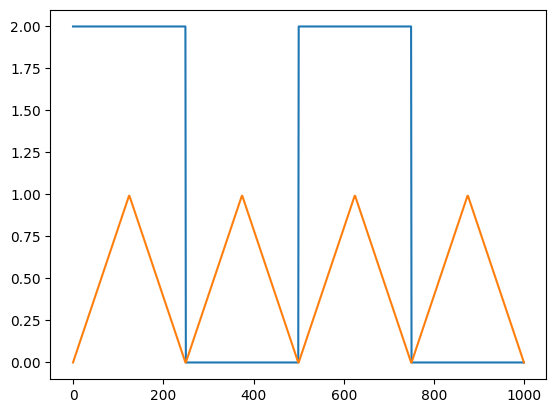

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Definir funciones para generar señal cuadrada y triangular en python 'puro' (sin librerías).

def square(amplitude=1, cycles=1, n=1000):
  """Funcion que genera una señal cuadrada

  Parameters
  ----------
  amplitude : float
    Amplitud de la señal cuadrada (1 por defecto)

  cycles : int
    Cantidad de ciclos generados (1 por defecto)

  n : int
    Cantidad de puntos generados (1000 por defecto)

  Returns
  -------
  list
    Lista con los valores de la señal cuadrada generada

  """
  # Para guardar los puntos
  vals = []

  # Repito cuantas veces diga ciclos
  for i in range(2 * cycles):

    for _ in range(int(n / (2 * cycles))):

      # Valor alto para i pares
      if i % 2 == 0:
        vals.append(amplitude)
      # Valor bajo para i impares
      else:
        vals.append(0)

  return vals


def triangular(amplitude=1, cycles=1, n=1000):
  """Funcion que genera una señal triangular

  Parameters
  ----------
  amplitude : float
    Amplitud de la señal triangular (1 por defecto)

  cycles : int
    Cantidad de ciclos generados (1 por defecto)

  n : int
    Cantidad de puntos generados (1000 por defecto)

  Returns
  -------
  list
    Lista con los valores de la señal triangular generada

  """
  # Para guardar los puntos
  vals = []
  # Divido la amplitud en la cantidad de pasos necesarios
  ramp = []
  for i in range(int(n / (2 * cycles))):

    ramp.append(i * (amplitude / int(n / (2 * cycles))))

  for i in range(2 * cycles):

    # Concateno lista normal para i pares
    if i % 2 == 0:
      vals += ramp
    # Concateno lista al reves para i impares
    else:
      vals += ramp[::-1]

  return vals


plt.plot(square(amplitude=2, cycles=2))
plt.plot(triangular(cycles=4))
plt.show()

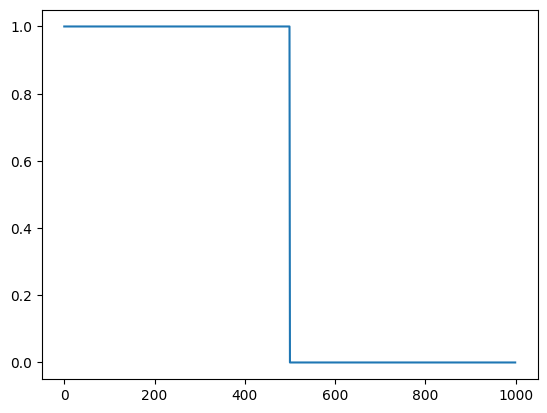

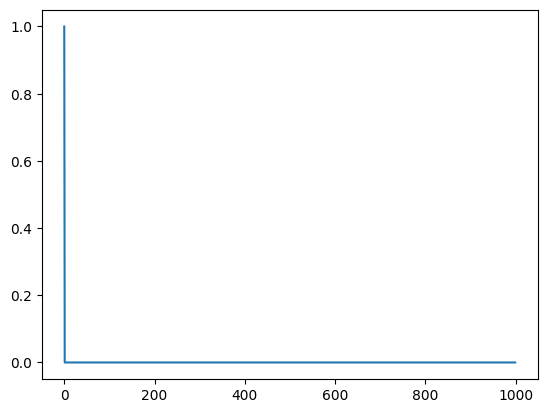

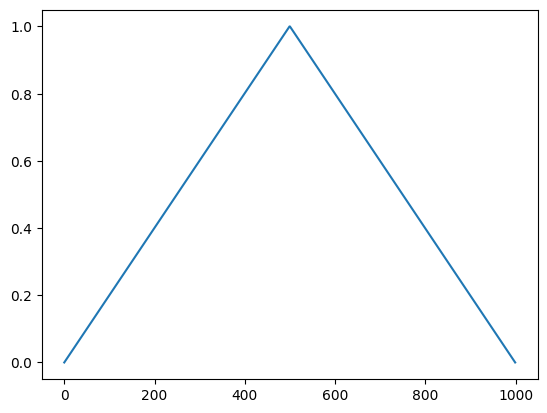

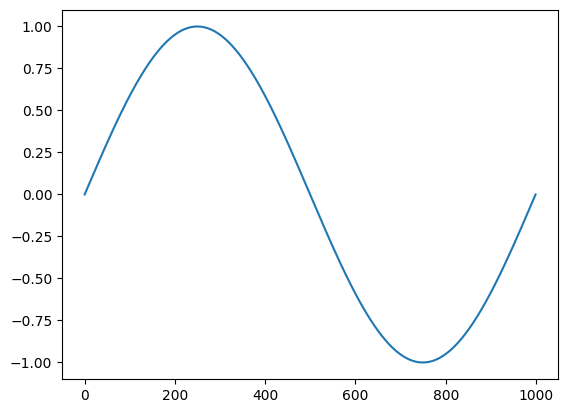

In [42]:
# 2. Generar, con *numpy* y/o *scipy.signal*, las señales: cuadrada, dirac, triangular, y senoidal.

n = 1000
t = np.linspace(0, 1, n)
# Pista: Esto es como lo que hicimos en el punto anterior, pero usando el método
# np.append en lugar del .append propio de Python.

# Señal Cuadrada con numpy
square_wave = np.concatenate(
  (
    np.array([1 for _ in range(int(n / 2))]),
    np.array([0 for _ in range(int(n / 2))])
  )
)

plt.plot(square_wave)
plt.show()

# Señal delta de dirac con numpy
delta_dirac = np.concatenate(
  (
    np.array([1]),
    np.array([0 for _ in range(n)])[0:-1:]
  )
)

plt.plot(delta_dirac)
plt.show()

# Señal triangular con numpy
triangular_wave = np.concatenate(
  (
    np.array(np.linspace(0, 1, 500)),
    np.array(np.linspace(0, 1, 500)[::-1])
  )
)

plt.plot(triangular_wave)
plt.show()

# Señal senoidal con numpy
sine_wave = np.sin(2 * np.pi * 1 * t)

plt.plot(sine_wave)
plt.show()

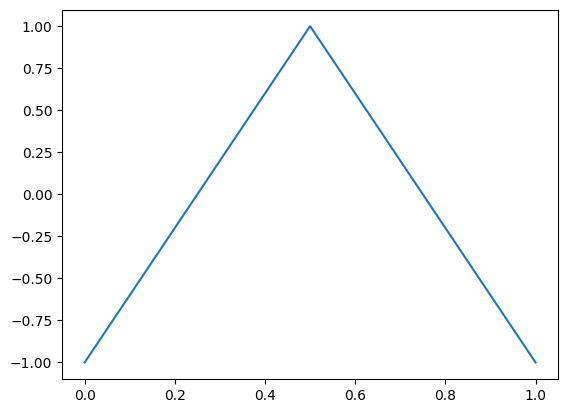

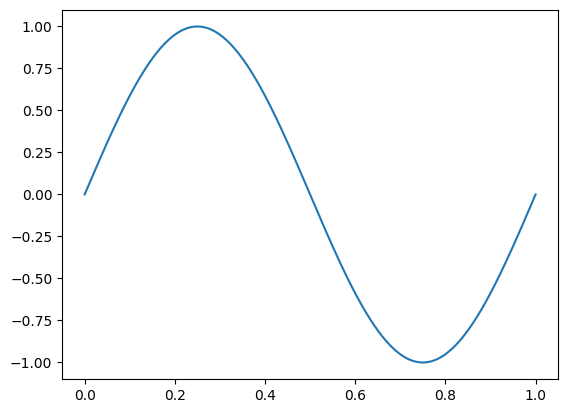

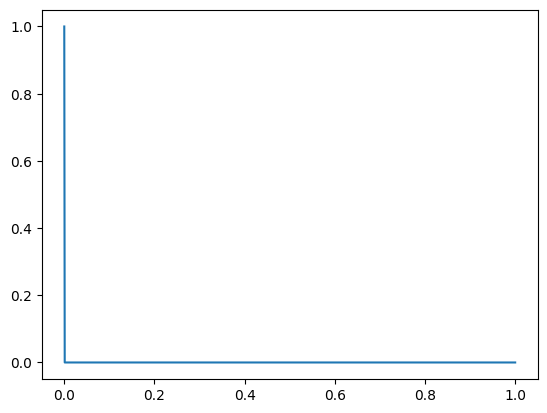

In [43]:
from scipy import signal as sig

# 3. Hacer lo mismo que en el punto anterior usando una base de tiempo. Graficar todas las señales.

# Todas son de 1 Hz en un segundo

# Señal triangular con numpy/scipy? (pista: sig.sawtooth)
plt.plot(t, sig.sawtooth(2 * np.pi * 1 * t, 0.5))
plt.show()

# Señal senoidal con numpy/scipy? (pista: np.sin)
plt.plot(t, np.sin(2 * np.pi * 1 * t))
plt.show()

# Delta de dirac con numpy/scipy? (pista: sig.unit_impulse)
plt.plot(t, sig.unit_impulse(n))
plt.show()


In [44]:
# 4. Calcular máximos y mínimos con subindices en python puro.

min = 1000
max = -1000

for i in t:
  if i < min:
    min = i
  if i > max:
    max = i

print("Sin numpy")
print(f"Valor min de t: {min}")
print(f"Valor max de t: {max}")

# 5. Idem anterior con numpy.

print("Con numpy")
print(f"Valor min de t: {np.min(t)}")
print(f"Valor max de t: {np.max(t)}")


Sin numpy
Valor min de t: 0.0
Valor max de t: 1.0
Con numpy
Valor min de t: 0.0
Valor max de t: 1.0
